In [737]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [738]:
df=pd.read_csv(r"carpricepred.csv")

In [739]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,Unnamed: 9,max_power bhp,Unnamed: 11,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,NaN,74.00,NaN,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,NaN,103.52,NaN,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,NaN,78.00,NaN,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,NaN,90.00,NaN,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,NaN,88.20,NaN,5.0


In [740]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [741]:
df.drop('Unnamed: 11', axis=1, inplace=True)


In [742]:
df.drop('Unnamed: 9', axis=1, inplace=True)


In [743]:
df.drop('name', axis=1, inplace=True)


In [744]:
#df.drop('year',axis=1,inplace=True)

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8128 non-null   int64  
 1   selling_price    8128 non-null   int64  
 2   km_driven        8128 non-null   int64  
 3   fuel             8128 non-null   object 
 4   seller_type      8128 non-null   object 
 5   transmission     8128 non-null   object 
 6   owner            8128 non-null   object 
 7   mileage kmpl/kg  7907 non-null   float64
 8   max_power bhp    7912 non-null   float64
 9   seats            7908 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


In [746]:
df['max_power bhp'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,
        67.   ,  82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,
        88.8  ,  83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,
        81.83 ,  40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,
        83.14 ,  67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 ,
       103.25 , 171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,
        88.76 ,  86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 ,
       189.   ,  67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   ,
       120.   ,  94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 ,
       138.1  ,  83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   ,
       214.56 , 177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 ,
       204.   , 141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  ,
       108.5  , 103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  ,
       400.   ,  68.

In [747]:
import warnings
warnings.filterwarnings("ignore")

In [748]:
df['max_power bhp'].fillna(df['max_power bhp'].mean(), inplace=True)

In [749]:
df['mileage kmpl/kg'].fillna(df['mileage kmpl/kg'].mean(), inplace=True)

In [750]:
df['seats'].fillna(df['seats'].mean(), inplace=True)

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8128 non-null   int64  
 1   selling_price    8128 non-null   int64  
 2   km_driven        8128 non-null   int64  
 3   fuel             8128 non-null   object 
 4   seller_type      8128 non-null   object 
 5   transmission     8128 non-null   object 
 6   owner            8128 non-null   object 
 7   mileage kmpl/kg  8128 non-null   float64
 8   max_power bhp    8128 non-null   float64
 9   seats            8128 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


In [752]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage kmpl/kg    0
max_power bhp      0
seats              0
dtype: int64

In [753]:
df.duplicated().sum()

1221

In [754]:
df.drop_duplicates(inplace=True)

In [755]:
df.duplicated().sum()

0

In [756]:
num_col = df.select_dtypes(['int64','float64'])
cat_col = df.select_dtypes('object')

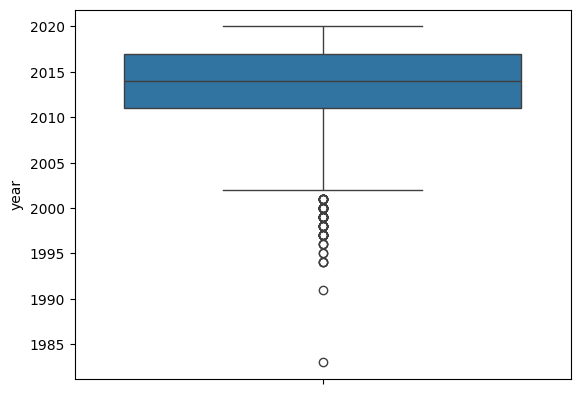

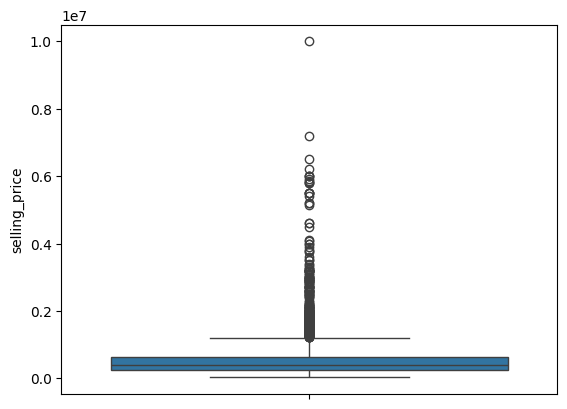

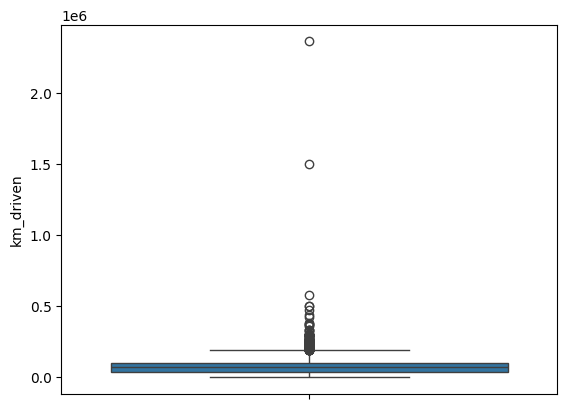

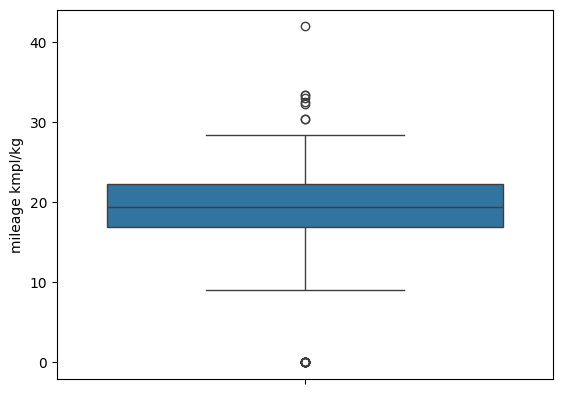

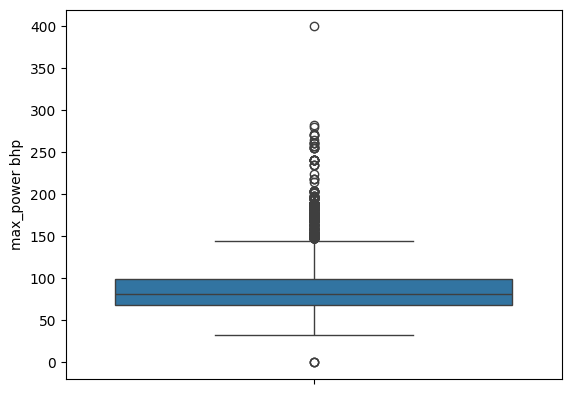

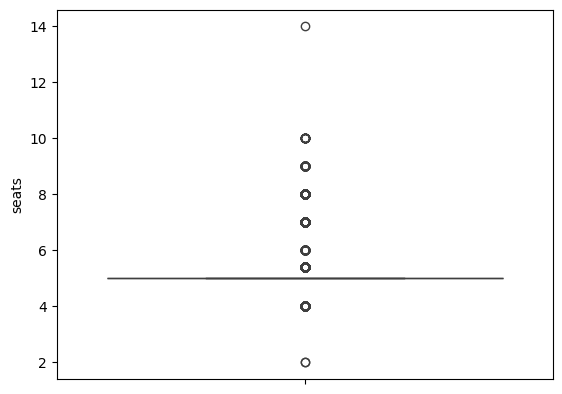

In [757]:
for col in num_col:
    sns.boxplot(df[col])
    plt.show()

In [758]:
# Find out Quartiles Q1 & Q3
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['year'] = df['year'].apply(outlier)

In [759]:
# Find out Quartiles Q1 & Q3
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['selling_price'] = df['selling_price'].apply(outlier)

In [760]:
# Find out Quartiles Q1 & Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['km_driven'] = df['km_driven'].apply(outlier)

In [761]:
# Find out Quartiles Q1 & Q3
Q1 = df['mileage kmpl/kg'].quantile(0.25)
Q3 = df['mileage kmpl/kg'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['mileage kmpl/kg'] = df['mileage kmpl/kg'].apply(outlier)

In [762]:
# Find out Quartiles Q1 & Q3
Q1 = df['max_power bhp'].quantile(0.25)
Q3 = df['max_power bhp'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['max_power bhp'] = df['max_power bhp'].apply(outlier)

In [763]:
# Find out Quartiles Q1 & Q3
Q1 = df['seats'].quantile(0.25)
Q3 = df['seats'].quantile(0.75)
IQR = Q3 - Q1

# Calculated the upper bound and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with lower bound and upper bound
def outlier(value):
    if value < lower_bound:
        return lower_bound
    elif value > upper_bound:
        return upper_bound
    else:
        return value

# Apply outlier function on the column
df['seats'] = df['seats'].apply(outlier)

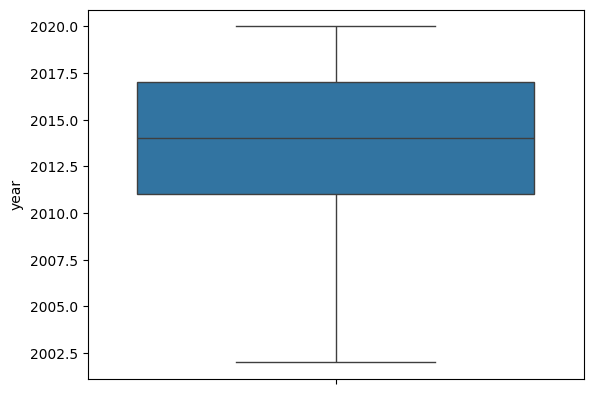

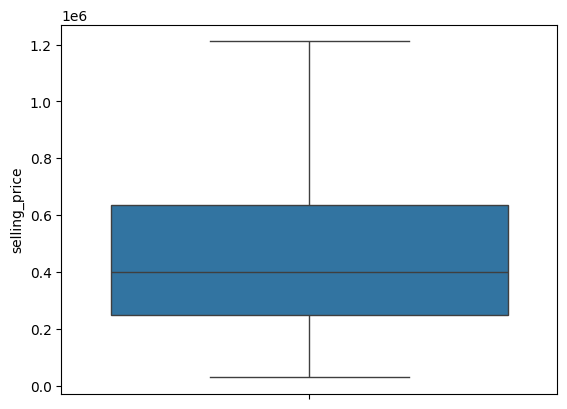

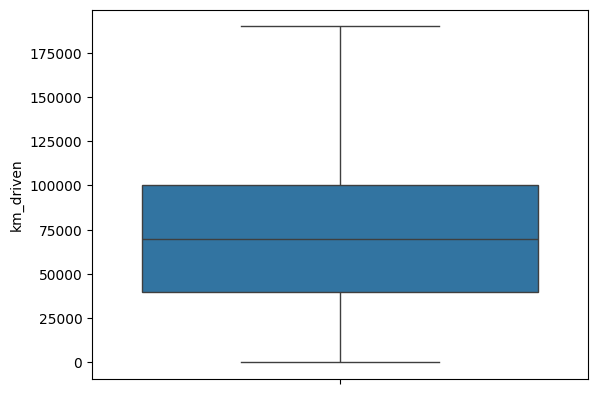

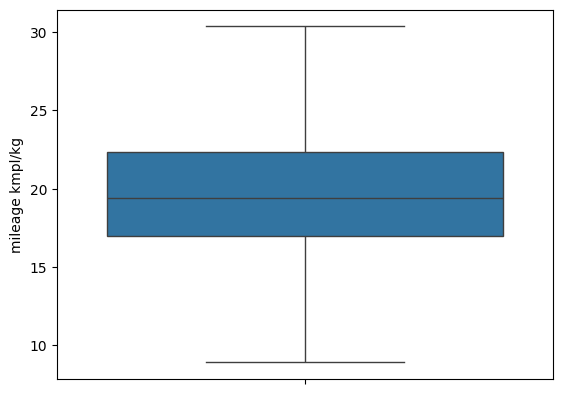

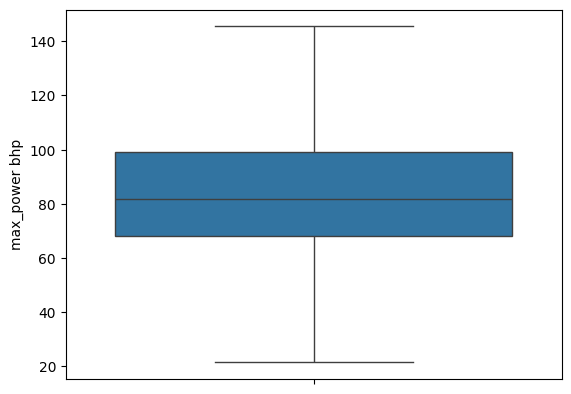

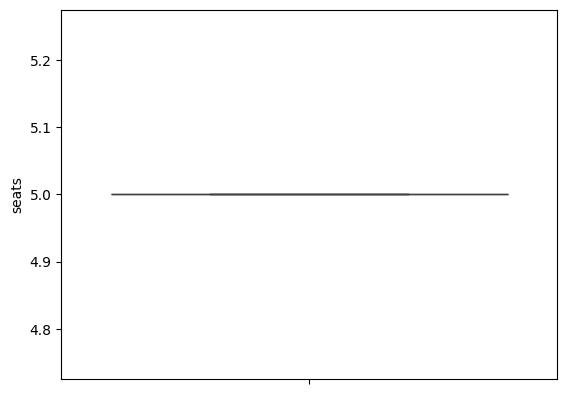

In [764]:
for col in num_col:
    sns.boxplot(df[col])
    plt.show()

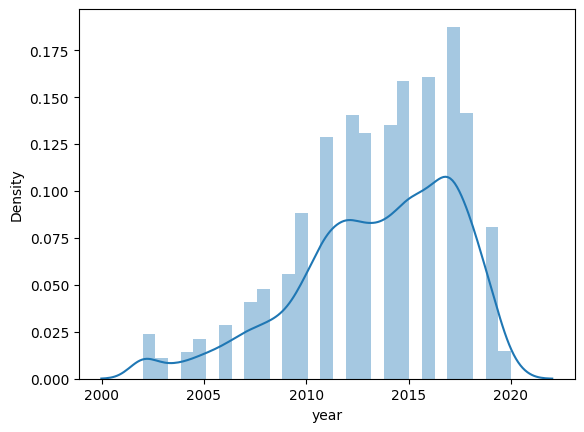

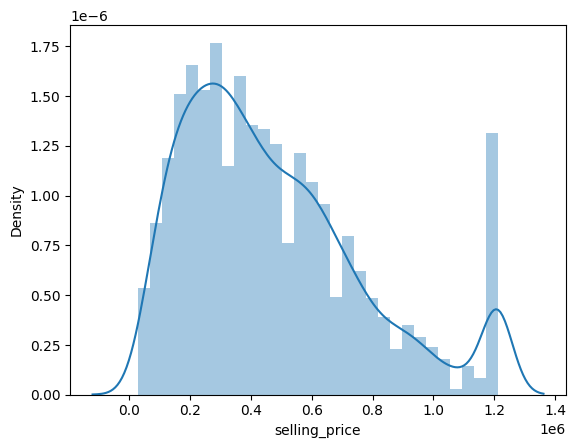

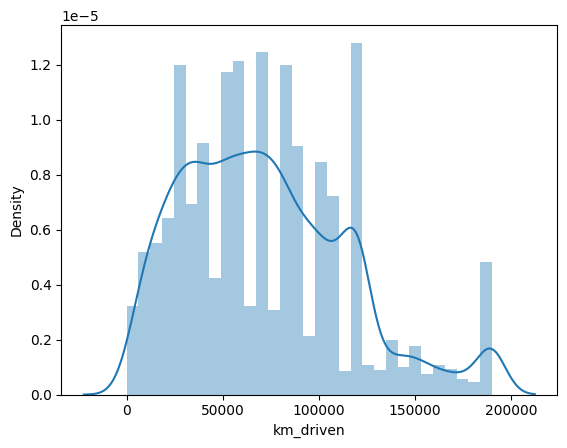

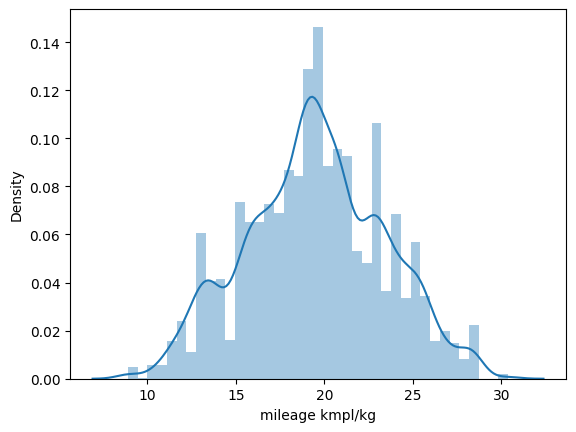

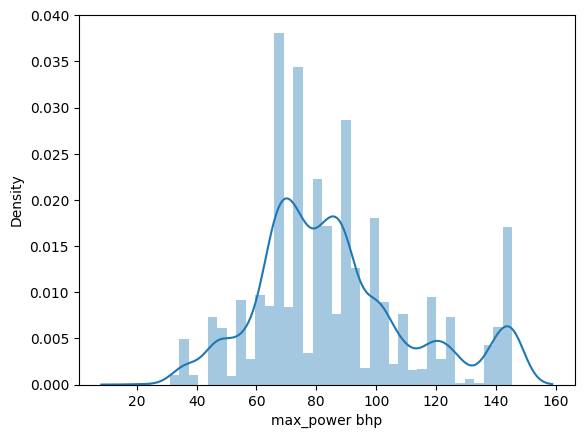

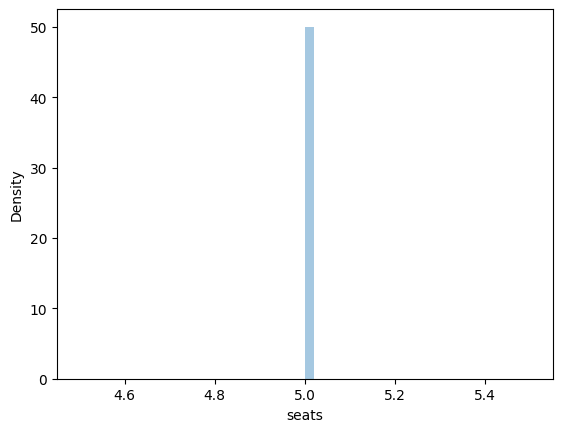

In [765]:
for col in num_col:
    sns.distplot(df[col])
    plt.show()

In [766]:
for col in num_col:
    print(col,":",df[col].skew())

year : -0.7357343505118503
selling_price : 0.8848349981519281
km_driven : 0.6827894917294522
mileage kmpl/kg : -0.004753615594620786
max_power bhp : 0.6635662334597656
seats : 0.0


In [767]:
for col in num_col:
    if df[col].skew()>0.5:
        df[col]=np.sqrt(df[col])
    print(col,":",df[col].skew())

year : -0.7357343505118503
selling_price : 0.23167633036444402
km_driven : -0.08282739703121884
mileage kmpl/kg : -0.004753615594620786
max_power bhp : 0.27311327779239464
seats : 0.0


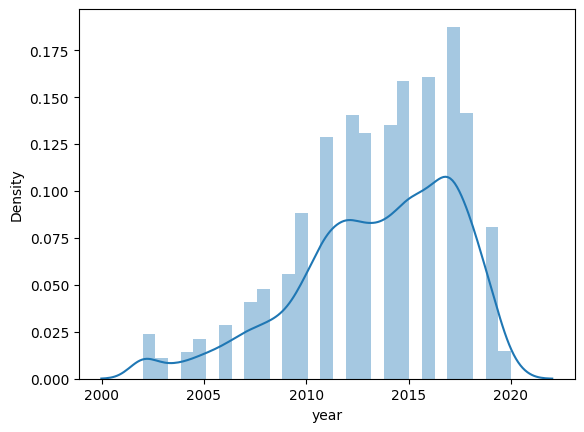

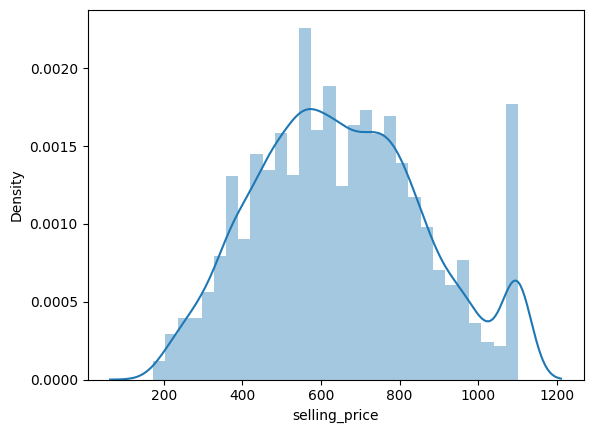

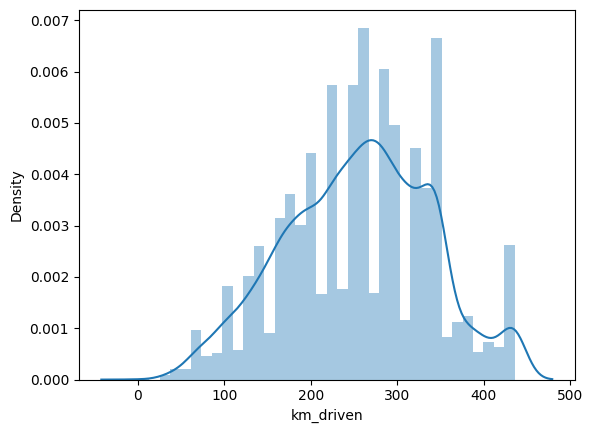

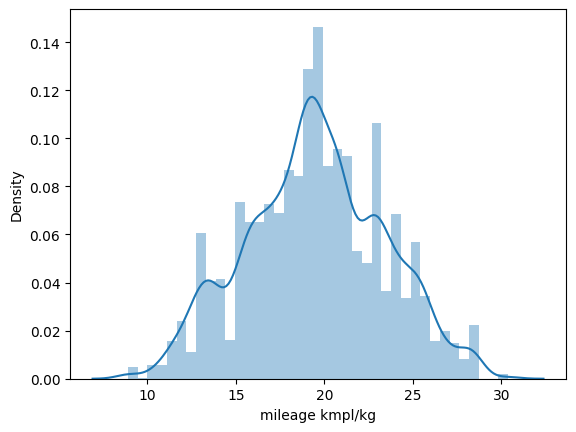

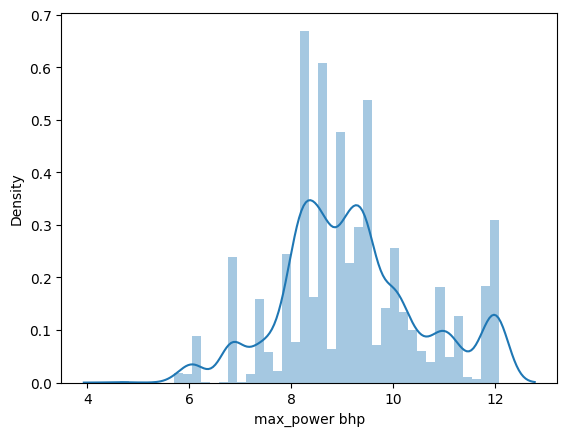

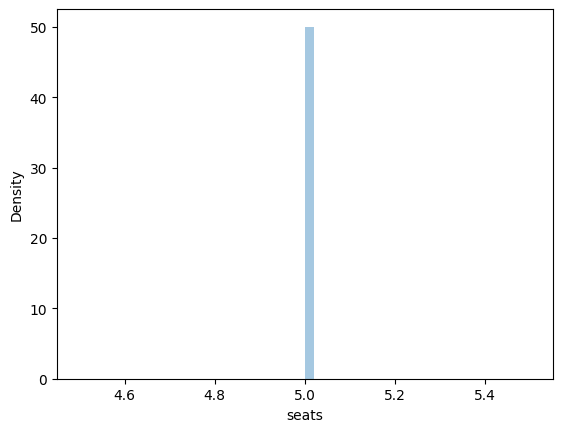

In [768]:
for col in num_col:
    sns.distplot(df[col])
    plt.show()

In [769]:
cat_col.head()

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Petrol,Individual,Manual,Third Owner
3,Diesel,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner


In [770]:
num_col.head()

,year,selling_price,km_driven,mileage kmpl/kg,max_power bhp,seats
0,2014,450000,145500,23.40,74.00,5.0
1,2014,370000,120000,21.14,103.52,5.0
2,2006,158000,140000,17.70,78.00,5.0
3,2010,225000,127000,23.00,90.00,5.0
4,2007,130000,120000,16.10,88.20,5.0


In [771]:
df['fuel'] = df['fuel'].map({'Diesel':0, 'Petrol':1, 'LPG':2, 'CNG':3})

In [772]:
df['seller_type'] = df['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

In [773]:
df['transmission'] = df['transmission'].map({'Manual':0, 'Automatic':1})

In [774]:
df['owner']=df['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2,'Fourth & Above Owner':3, 'Test Drive Car':4})

In [775]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,max_power bhp,seats
0,2014.0,670.820393,381.444622,0,0,0,0,23.40,8.602325,5.0
1,2014.0,608.276253,346.410162,0,0,0,1,21.14,10.174478,5.0
2,2006.0,397.492138,374.165739,1,0,0,2,17.70,8.831761,5.0
3,2010.0,474.341649,356.370594,0,0,0,0,23.00,9.486833,5.0
4,2007.0,360.555128,346.410162,1,0,0,0,16.10,9.391486,5.0


In [776]:
X = df.drop('selling_price',axis=1)
Y = df['selling_price']

In [777]:
X.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage kmpl/kg', 'max_power bhp', 'seats'],
      dtype='object')

In [778]:
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage kmpl/kg,max_power bhp,seats
0,2014.0,381.444622,0,0,0,0,23.40,8.602325,5.0
1,2014.0,346.410162,0,0,0,1,21.14,10.174478,5.0
2,2006.0,374.165739,1,0,0,2,17.70,8.831761,5.0
3,2010.0,356.370594,0,0,0,0,23.00,9.486833,5.0
4,2007.0,346.410162,1,0,0,0,16.10,9.391486,5.0
...,...,...,...,...,...,...,...,...,...
8121,2013.0,223.606798,1,0,0,1,18.90,8.191459,5.0
8122,2014.0,282.842712,0,0,0,1,22.54,9.419660,5.0
8123,2013.0,331.662479,1,0,0,0,18.50,9.102198,5.0
8124,2007.0,344.963766,0,0,0,3,16.80,10.488088,5.0


In [779]:
Y

0       670.820393
1       608.276253
2       397.492138
3       474.341649
4       360.555128
           ...    
8121    509.901951
8122    689.202438
8123    565.685425
8124    367.423461
8125    618.061486
Name: selling_price, Length: 6907, dtype: float64

In [780]:
from sklearn.model_selection import train_test_split

In [781]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [782]:
from sklearn.linear_model import LinearRegression

In [783]:
Linear_model = LinearRegression()

In [784]:
Linear_model.fit(x_train,y_train)

LinearRegression()

In [785]:
y_pred = Linear_model.predict(x_test)

In [786]:
from sklearn.metrics import r2_score

In [787]:
r2_score(y_test, y_pred)

0.791542484902304

In [788]:
Linear_model.score(x_train,y_train)

0.8002809113568681

In [789]:
Linear_model.score(x_test,y_test)

0.791542484902304

In [790]:
import pickle

In [791]:
with open ("Car_Price.pkl","wb") as file:
    pickle.dump(Linear_model,file)